<a href="https://colab.research.google.com/github/niyathimariya/Predicting-Student-Scores-Using-Linear-Regression-Based-on-Study-Hours/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.linear_model import LinearRegression

Importing Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


General information about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<Axes: >

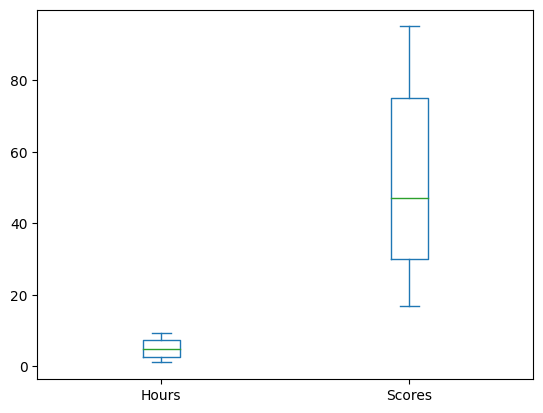

In [6]:
data.plot.box()

In [7]:
c=data.corr()

<Axes: >

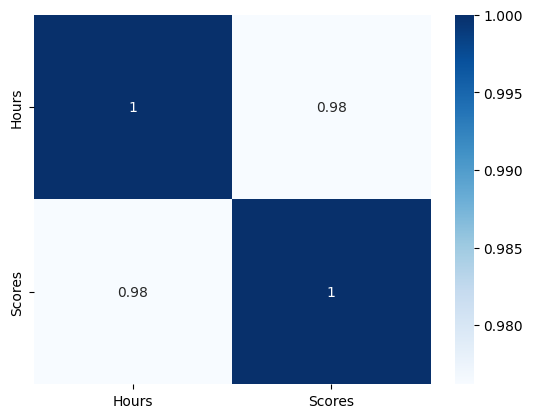

In [8]:
sns.heatmap(c,annot=True,cmap='Blues')

<ipython-input-9-73d2900659fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,x=data['Hours'])


<Axes: ylabel='Density'>

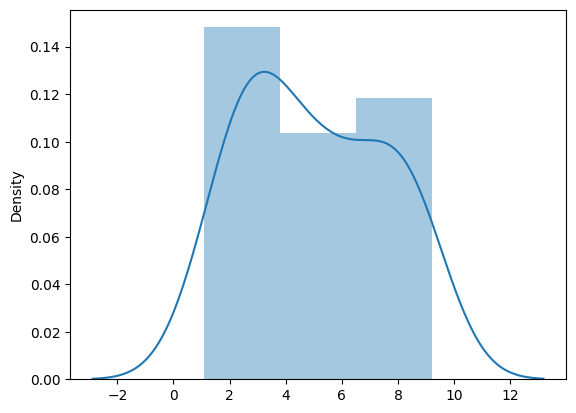

In [9]:
sns.distplot(data,x=data['Hours'])

<ipython-input-10-e030bf9aeed9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data,x=data['Scores'])


<Axes: ylabel='Density'>

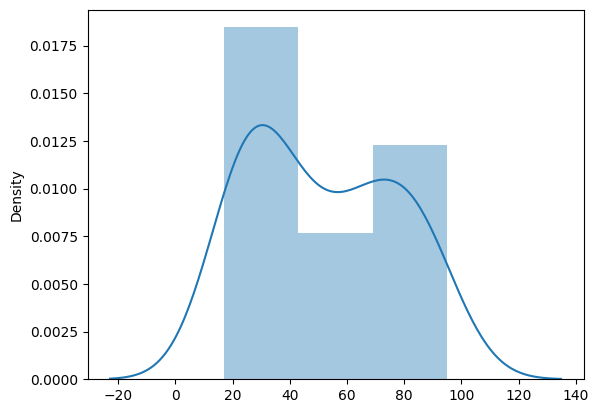

In [10]:
sns.distplot(data,x=data['Scores'])

Text(0.5, 1.0, 'No: of hours v/s Scores earned')

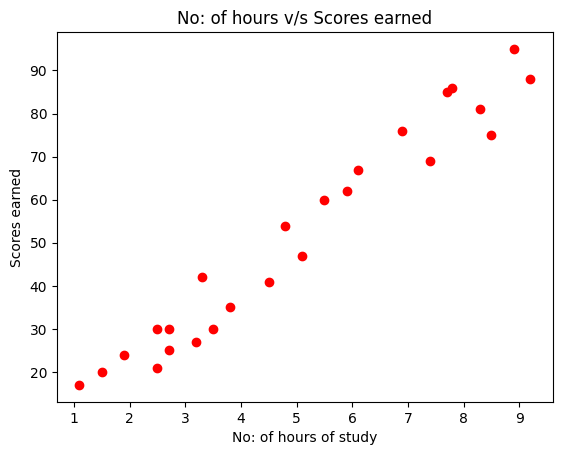

In [11]:
plt.scatter(data['Hours'],data['Scores'],color='red')
plt.xlabel('No: of hours of study')
plt.ylabel('Scores earned')
plt.title('No: of hours v/s Scores earned')

Linear Regression

In [12]:
import sklearn.preprocessing as pre

In [13]:
input_var=data.drop(['Scores'],axis=1)
target=data['Scores']

In [14]:
x_train,x_test,y_train,y_test=ms.train_test_split(input_var,target,test_size=.3,random_state=11111)

In [15]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

Output Prediction

In [16]:
y_pred=LR.predict(x_test)

In [17]:
y_test,y_pred

(11    62
 8     81
 13    42
 14    17
 7     60
 12    41
 2     27
 17    24
 Name: Scores, dtype: int64,
 array([60.01955163, 84.11124205, 33.92022035, 11.8361708 , 56.0042699 ,
        45.96606556, 32.91639991, 19.86673427]))

Text(0.5, 1.0, 'No: of hours v/s Scores earned (predicted)')

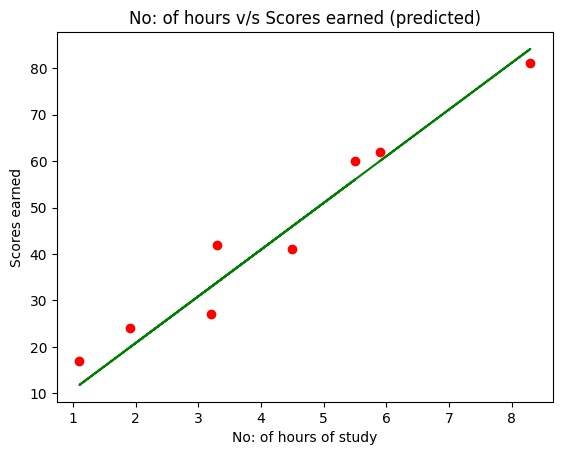

In [18]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='green')
plt.xlabel('No: of hours of study')
plt.ylabel('Scores earned')
plt.title('No: of hours v/s Scores earned (predicted)')

Results

In [19]:
Test_Score = LR.score(x_test,y_test)
Train_Score = LR.score(x_train,y_train)
print("Train Score: ",Train_Score)
print("Test Score: ",Test_Score)

Train Score:  0.9526202862606404
Test Score:  0.9413329445694139


Mean Squared Error

In [20]:
from sklearn import metrics
print('Mean Squared Error:',
      metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 24.783164228458233


In [21]:
a=pd.DataFrame([9.25])
y_output = LR.predict(a)
print('The predicted score of a student who studies 9.25 hours is',y_output)

The predicted score of a student who studies 9.25 hours is [93.64753618]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
